In [1]:
import os
import random
import numpy as np

def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

set_seed(25)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # No max width

In [3]:
df_1 = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df_2 = pd.read_csv("data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df_3 = pd.read_csv("data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df_4 = pd.read_csv("data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df_5 = pd.read_csv("data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df_6 = pd.read_csv("data/Wednesday-workingHours.pcap_ISCX.csv")
df_7 = pd.read_csv("data/Tuesday-WorkingHours.pcap_ISCX.csv")
df_8 = pd.read_csv("data/Monday-WorkingHours.pcap_ISCX.csv")

In [4]:
#df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], ignore_index=True)
df = pd.concat([df_5, df_6, df_7, df_8], ignore_index=True)

df.columns = df.columns.str.strip()

# Drop columns with ".number" suffix
df = df[[col for col in df.columns if not col.endswith(tuple(f".{i}" for i in range(100)))]]
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  


Label Mapping:
BENIGN -> 0
Bot -> 1
DDoS -> 2
DoS GoldenEye -> 3
DoS Hulk -> 4
DoS Slowhttptest -> 5
DoS slowloris -> 6
FTP-Patator -> 7
Heartbleed -> 8
Infiltration -> 9
PortScan -> 10
SSH-Patator -> 11
Web Attack � Brute Force -> 12
Web Attack � Sql Injection -> 13
Web Attack � XSS -> 14
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Fl

<Axes: >

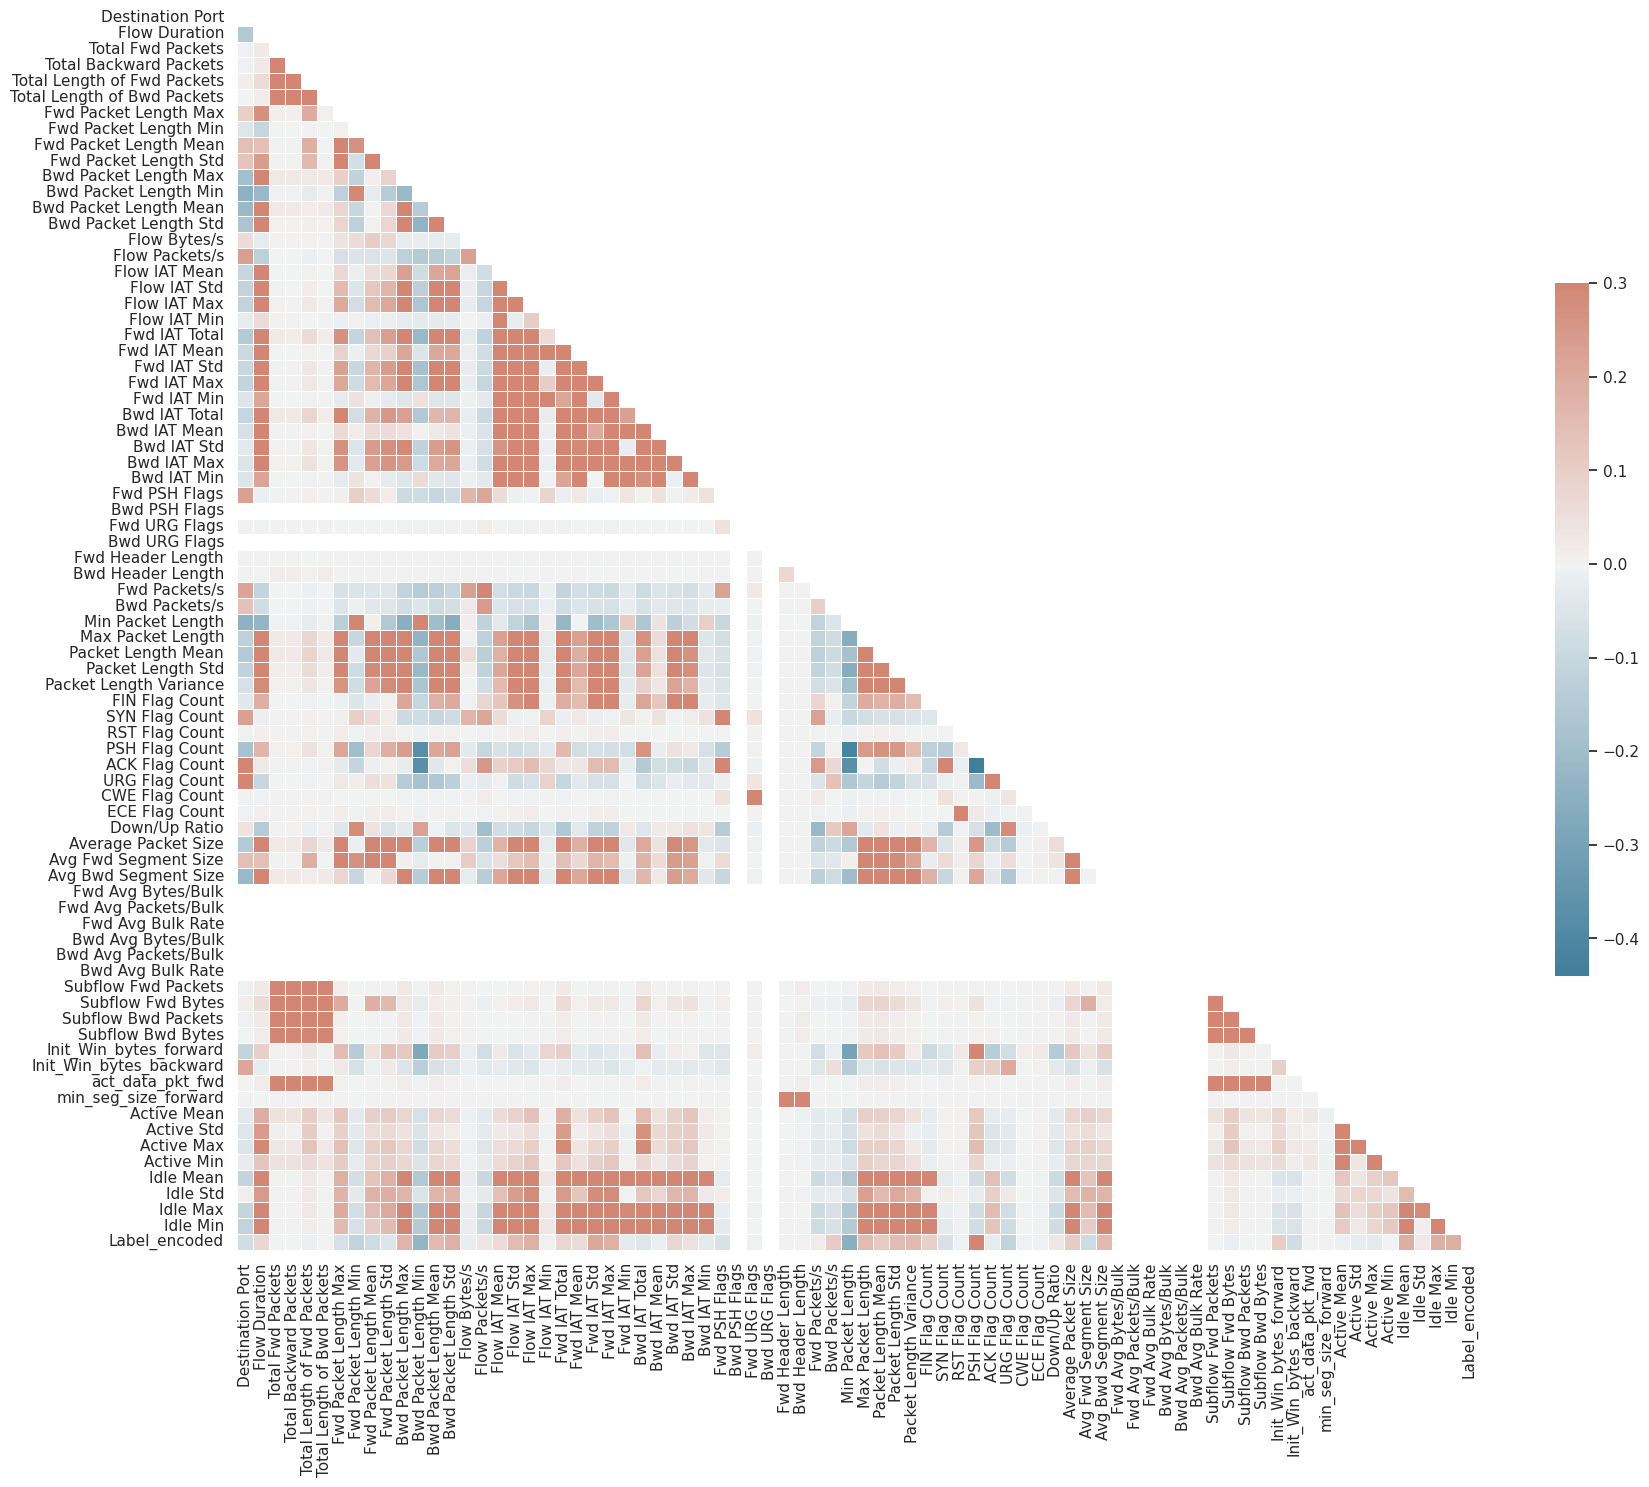

In [5]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the column
df['Label_encoded'] = le.fit_transform(df['Label'])


# Create and print the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping:")
for label, code in label_mapping.items():
    print(f"{label} -> {code}")


sns.set_theme(style="white")

# Compute the correlation matrix
df_temp = df.drop(columns=['Label'])
print(df_temp.columns)
corr = df_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Limpar Dados

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [6]:
df_backup = df.copy()

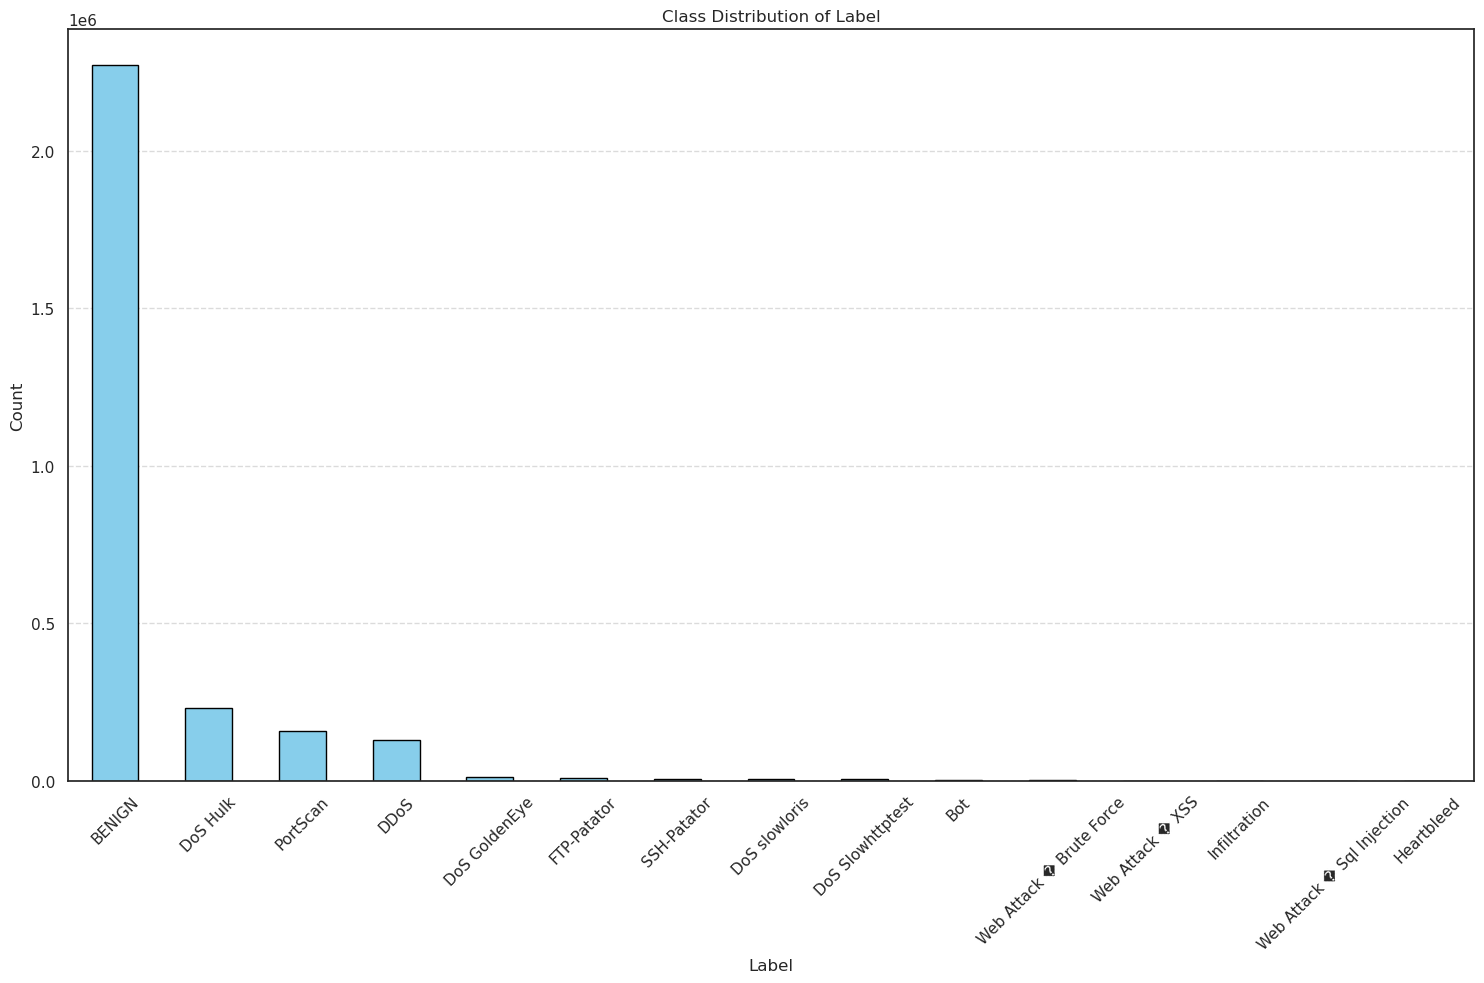

In [9]:
import matplotlib.pyplot as plt

# Count the values
label_counts = df['Label'].value_counts()

# Plot
plt.figure(figsize=(15,10))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Fazer o Modelo

In [7]:
import numpy as np
import pandas as pd

# Replace inf with NaN and then impute or drop
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  # or use imputation
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_encoded
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


## pipelone boost multiclass

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50; total time= 2.2min
[CV] END classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50; total time= 2.2min
[CV] END classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50; total time= 2.2min
[CV] END classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50; total time= 2.2min
[CV] END classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50; total time= 2.2min
Melhores parâmetros: {'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__n_estimators': 50}
Melhor score de validação: 0.9588
Acurácia no conjunto de teste: 0.9592


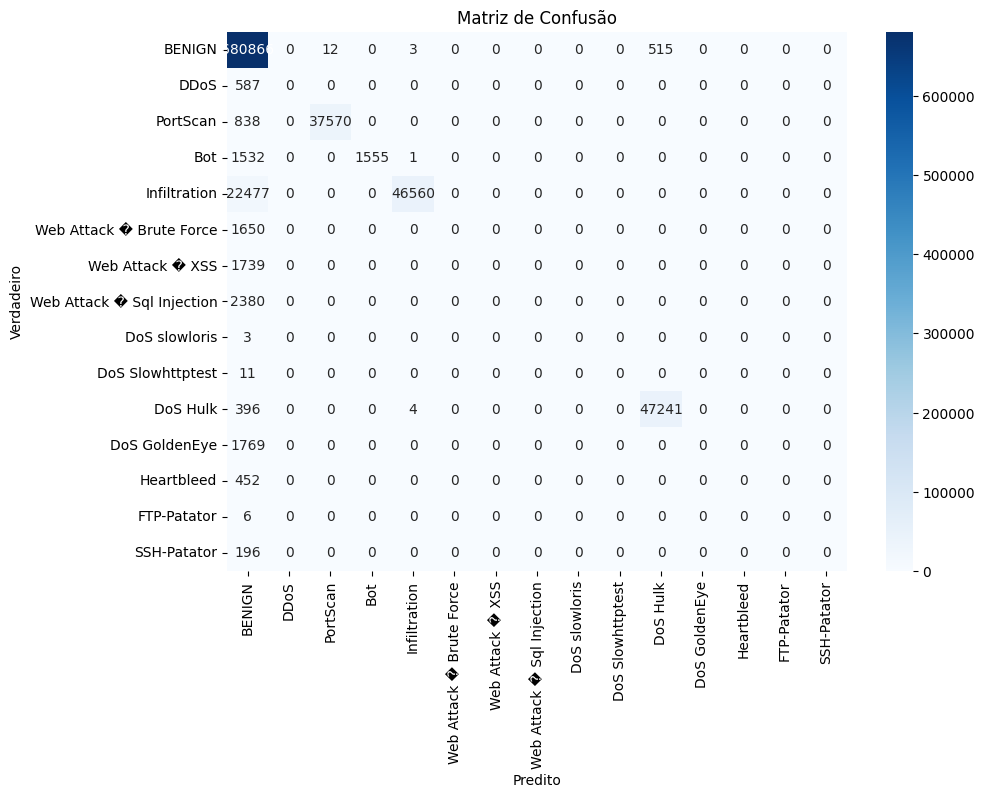


Relatório de Classificação:


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.95      1.00      0.98    681396
                      DDoS       0.00      0.00      0.00       587
                  PortScan       1.00      0.98      0.99     38408
                       Bot       1.00      0.50      0.67      3088
              Infiltration       1.00      0.67      0.81     69037
  Web Attack � Brute Force       0.00      0.00      0.00      1650
          Web Attack � XSS       0.00      0.00      0.00      1739
Web Attack � Sql Injection       0.00      0.00      0.00      2380
             DoS slowloris       0.00      0.00      0.00         3
          DoS Slowhttptest       0.00      0.00      0.00        11
                  DoS Hulk       0.99      0.99      0.99     47641
             DoS GoldenEye       0.00      0.00      0.00      1769
                Heartbleed       0.00      0.00      0.00       452
               FTP-Patator       0.00      0.00

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separação inicial dos dados
X = df.drop(columns=['Label'])
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25,stratify=y
)

# Criação do pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Etapa de normalização
    ('classifier', RandomForestClassifier(random_state=25))  # Modelo
])

# Grade de parâmetros para busca
param_grid = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [5],
    'classifier__max_features': ['log2']
}

# Configuração do Grid Search com validação cruzada
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Ajuste do modelo apenas com dados de treino
grid_search.fit(X_train, y_train)

# Resultados
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor score de validação: {grid_search.best_score_:.4f}")

# Avaliação no conjunto de teste
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_score:.4f}")

# Geração da matriz de confusão
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualização da matriz de confusão
class_names = y.unique()
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Métricas detalhadas
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=class_names.astype(str)))

# DataFrame com estatísticas da matriz
cm_df = pd.DataFrame(cm, 
                     index=[f'Verdadeiro {name}' for name in class_names], 
                     columns=[f'Predito {name}' for name in class_names])
print("\nDetalhes da Matriz de Confusão:")
print(cm_df)

## pipeline bin svm

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Separação dos dados
X = df.drop(columns=['Label'])
y = df['Label']

# 2. Filtrar apenas tráfego BENIGN para treino
X_BENIGN = X[y == 'BENIGN']
X_anomalous = X[y != 'BENIGN']
y_anomalous = y[y != 'BENIGN']

# 3. Treino e teste: apenas BENIGN para treino
X_train, X_test_BENIGN = train_test_split(X_BENIGN, test_size=0.3, random_state=25)
y_test_BENIGN = ['BENIGN'] * len(X_test_BENIGN)

# 4. Adiciona ataques no conjunto de teste
X_test = pd.concat([X_test_BENIGN, X_anomalous])
y_test = y_test_BENIGN + ['ANOMALY'] * len(X_anomalous)

# 5. Pipeline com One-Class SVM
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ocsvm', OneClassSVM(kernel='rbf', nu=0.5, gamma='auto'))  # adjust `nu` if needed
])

# 6. Treina o modelo com dados normais
pipeline.fit(X_train)

# 7. Predição (1 = BENIGN, -1 = ANOMALY)
y_pred = pipeline.predict(X_test)
y_pred = ['BENIGN' if x == 1 else 'ANOMALY' for x in y_pred]

# 8. Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=['BENIGN', 'ANOMALY'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'ANOMALY'],
            yticklabels=['BENIGN', 'ANOMALY'])
plt.title('Matriz de Confusão - One-Class SVM')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# 9. Métricas
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['BENIGN', 'ANOMALY']))

# 10. DataFrame com a matriz
cm_df = pd.DataFrame(cm,
                     index=['Verdadeiro BENIGN', 'Verdadeiro ANOMALY'],
                     columns=['Predito BENIGN', 'Predito ANOMALY'])
print("\nDetalhes da Matriz de Confusão:")
print(cm_df)


KeyboardInterrupt: 

## Binary with autoencoder

Epoch 1/100
7049/7098 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.0128
Epoch 1: val_loss improved from inf to 0.00115, saving model to best_autoencoder_model.keras
7098/7098 ━━━━━━━━━━━━━━━━━━━━ 7s 906us/step - loss: 0.0127 - val_loss: 0.0012
Epoch 2/100
7077/7098 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 9.1529e-04
Epoch 2: val_loss improved from 0.00115 to 0.00075, saving model to best_autoencoder_model.keras
7098/7098 ━━━━━━━━━━━━━━━━━━━━ 6s 881us/step - loss: 9.1501e-04 - val_loss: 7.5371e-04
Epoch 3/100
7052/7098 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 6.2224e-04
Epoch 3: val_loss improved from 0.00075 to 0.00040, saving model to best_autoencoder_model.keras
7098/7098 ━━━━━━━━━━━━━━━━━━━━ 6s 842us/step - loss: 6.2187e-04 - val_loss: 4.0454e-04
Epoch 4/100
7095/7098 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 4.0678e-04
Epoch 4: val_loss improved from 0.00040 to 0.00040, saving model to best_autoencoder_model.keras
7098/7098 ━━━━━━━━━━━━━━━━━━━━ 6s 838us/step - loss: 4.0678e-04

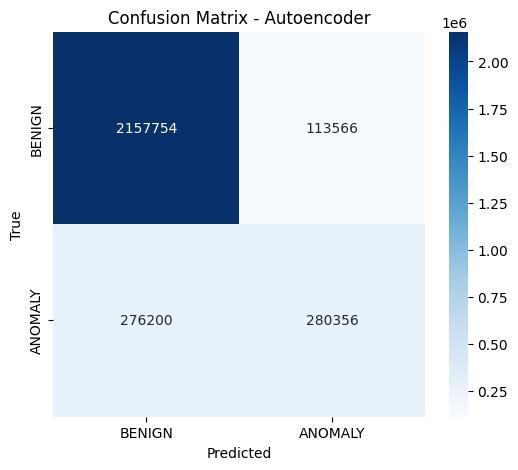


Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.89      0.95      0.92   2271320
     ANOMALY       0.71      0.50      0.59    556556

    accuracy                           0.86   2827876
   macro avg       0.80      0.73      0.75   2827876
weighted avg       0.85      0.86      0.85   2827876



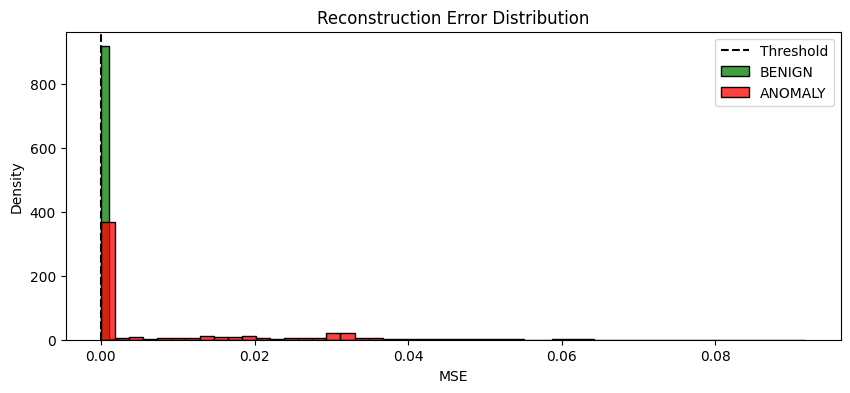

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1. Preprocessing
X = df.drop(columns=['Label'])
y = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)  # 0 = BENIGN, 1 = ANOMALY

# 2. BENIGNize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split BENIGN data for training
X_train = X_scaled[y == 0]  # only BENIGN
X_test = X_scaled           # all data
y_test = y.values           # ground truth

# 4. Autoencoder architecture
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# 5. Training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_autoencoder_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train with callbacks
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

# 6. Reconstruction error
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# 7. Threshold: Use max error from training or tune based on percentile
threshold = np.percentile(mse[y == 0], 95)  # 95th percentile of BENIGN
print(f"Threshold: {threshold:.4f}")

# 8. Classify based on threshold
y_pred = (mse > threshold).astype(int)

# 9. Evaluation
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'ANOMALY'],
            yticklabels=['BENIGN', 'ANOMALY'])
plt.title('Confusion Matrix - Autoencoder')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['BENIGN', 'ANOMALY']))

# Optional: Plot reconstruction error distribution
plt.figure(figsize=(10, 4))
sns.histplot(mse[y == 0], bins=50, color='green', label='BENIGN', stat='density')
sns.histplot(mse[y == 1], bins=50, color='red', label='ANOMALY', stat='density')
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('MSE')
plt.legend()
plt.show()


## pipeline bin RandomForest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Labeling: BENIGN = 0, Attack = 1
X = df.drop(columns=['Label'])
y = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Build Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Etapa de normalização
    ('classifier', RandomForestClassifier(random_state=25))  # Modelo
])

param_grid = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [5],
    'classifier__max_features': ['log2']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(f"Melhores parâmetros: {grid.best_params_}")
# pipeline.fit(X_train, y_train)
# best_model = pipeline

# 5. Predict
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 6. Evaluation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'ANOMALY'],
            yticklabels=['BENIGN', 'ANOMALY'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 7. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['BENIGN', 'ANOMALY']))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


## Deployment

In [11]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'binary_classification_model.pkl')

['binary_classification_model.pkl']